Name: ZAHID HASAN TALUKDER (ANIK)

Id: 20-42284-1

Section: CVPR [C]

**INTRO:**

In this project, we aim to build a Convolutional Neural Network (CNN) to classify the CIFAR-10 dataset. We will explore techniques such as grayscale conversion, different optimizers, and regularization to achieve accurate classification without overfitting. The goal is to find the best model for this benchmark dataset and gain insights into CNN performance for image classification tasks.

Dataset and Preprocessing:

We will be working with the CIFAR-10 dataset, which is widely used for image classification tasks. The CIFAR-10 dataset consists of 60,000 32x32x3 color images in ten different categories or classes.

To begin, you can download the CIFAR-10 dataset from the following link: CIFAR-10 Dataset

Or we can import it using: from tensorflow.keras.datasets import cifar10

Importing necessary libraries :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Load the CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to range [0, 1]

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels

In [ ]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# List of momentum values for each optimizer

In [ ]:
momentum_values_sgd = [0.0, 0.5, 0.9]
momentum_values_rmsprop = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]

# Lists to store history of each optimizer

In [ ]:
sgd_history_list = []
adam_history_list = []
rmsprop_history_list = []

# Train models with different optimizers and momentum values

In [ ]:
for momentum_val in momentum_values_sgd:
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    sgd_model = create_cnn_model()
    sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    sgd_history = sgd_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
    sgd_history_list.append(sgd_history)

for momentum_val in momentum_values_rmsprop:
    rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=momentum_val)
    rmsprop_model = create_cnn_model()
    rmsprop_model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
    rmsprop_history_list.append(rmsprop_history)

for beta1_val in beta1_values_adam:
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    adam_model = create_cnn_model()
    adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    adam_history = adam_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
    adam_history_list.append(adam_history)



Epoch 1/20
782/782 [==============================] - 33s 41ms/step - loss: 2.1314 - accuracy: 0.2192 - val_loss: 1.9484 - val_accuracy: 0.3056
Epoch 2/20
782/782 [==============================] - 32s 41ms/step - loss: 1.8561 - accuracy: 0.3340 - val_loss: 1.9836 - val_accuracy: 0.3198
Epoch 3/20
782/782 [==============================] - 32s 41ms/step - loss: 1.6530 - accuracy: 0.4105 - val_loss: 1.6115 - val_accuracy: 0.4215
Epoch 4/20
782/782 [==============================] - 35s 45ms/step - loss: 1.5231 - accuracy: 0.4536 - val_loss: 1.4652 - val_accuracy: 0.4644
Epoch 5/20
782/782 [==============================] - 41s 53ms/step - loss: 1.4329 - accuracy: 0.4868 - val_loss: 1.4858 - val_accuracy: 0.4667
Epoch 6/20
782/782 [==============================] - 32s 41ms/step - loss: 1.3601 - accuracy: 0.5160 - val_loss: 1.4040 - val_accuracy: 0.4881
Epoch 7/20
782/782 [==============================] - 32s 40ms/step - loss: 1.3006 - accuracy: 0.5390 - val_loss: 1.3464 - val_accuracy:

Epoch 18/20
782/782 [==============================] - 32s 41ms/step - loss: 0.1348 - accuracy: 0.9530 - val_loss: 1.6823 - val_accuracy: 0.7001
Epoch 19/20
782/782 [==============================] - 32s 41ms/step - loss: 0.1289 - accuracy: 0.9546 - val_loss: 1.7473 - val_accuracy: 0.6999
Epoch 20/20
782/782 [==============================] - 32s 40ms/step - loss: 0.1217 - accuracy: 0.9571 - val_loss: 1.7457 - val_accuracy: 0.6987
Epoch 1/20
782/782 [==============================] - 34s 42ms/step - loss: 1.6086 - accuracy: 0.4183 - val_loss: 1.4452 - val_accuracy: 0.4840
Epoch 2/20
782/782 [==============================] - 32s 41ms/step - loss: 1.1813 - accuracy: 0.5827 - val_loss: 1.2593 - val_accuracy: 0.5656
Epoch 3/20
782/782 [==============================] - 32s 41ms/step - loss: 0.9835 - accuracy: 0.6561 - val_loss: 1.1588 - val_accuracy: 0.5810
Epoch 4/20
782/782 [==============================] - 32s 41ms/step - loss: 0.8415 - accuracy: 0.7073 - val_loss: 1.2015 - val_accura

Epoch 15/20
782/782 [==============================] - 33s 42ms/step - loss: 1.2888 - accuracy: 0.5609 - val_loss: 1.4027 - val_accuracy: 0.5230
Epoch 16/20
782/782 [==============================] - 32s 42ms/step - loss: 1.2882 - accuracy: 0.5610 - val_loss: 1.2827 - val_accuracy: 0.5648
Epoch 17/20
782/782 [==============================] - 32s 42ms/step - loss: 1.2639 - accuracy: 0.5723 - val_loss: 1.3878 - val_accuracy: 0.5315
Epoch 18/20
782/782 [==============================] - 33s 42ms/step - loss: 1.2551 - accuracy: 0.5723 - val_loss: 1.3199 - val_accuracy: 0.5499
Epoch 19/20
782/782 [==============================] - 33s 42ms/step - loss: 1.2602 - accuracy: 0.5709 - val_loss: 1.3750 - val_accuracy: 0.5657
Epoch 20/20
782/782 [==============================] - 34s 43ms/step - loss: 1.2551 - accuracy: 0.5729 - val_loss: 1.4214 - val_accuracy: 0.5192
Epoch 1/20
782/782 [==============================] - 37s 46ms/step - loss: 1.5881 - accuracy: 0.4268 - val_loss: 1.7835 - val_acc

Epoch 12/20
782/782 [==============================] - 34s 43ms/step - loss: 0.4050 - accuracy: 0.8568 - val_loss: 0.9652 - val_accuracy: 0.7097
Epoch 13/20
782/782 [==============================] - 34s 43ms/step - loss: 0.3635 - accuracy: 0.8714 - val_loss: 0.9624 - val_accuracy: 0.7204
Epoch 14/20
782/782 [==============================] - 33s 42ms/step - loss: 0.3154 - accuracy: 0.8902 - val_loss: 1.0178 - val_accuracy: 0.7134
Epoch 15/20
782/782 [==============================] - 33s 42ms/step - loss: 0.2833 - accuracy: 0.8991 - val_loss: 1.0850 - val_accuracy: 0.7116
Epoch 16/20
782/782 [==============================] - 33s 42ms/step - loss: 0.2529 - accuracy: 0.9113 - val_loss: 1.1355 - val_accuracy: 0.7174
Epoch 17/20
782/782 [==============================] - 33s 42ms/step - loss: 0.2210 - accuracy: 0.9221 - val_loss: 1.1962 - val_accuracy: 0.7138
Epoch 18/20
782/782 [==============================] - 33s 43ms/step - loss: 0.2008 - accuracy: 0.9284 - val_loss: 1.2835 - val_ac

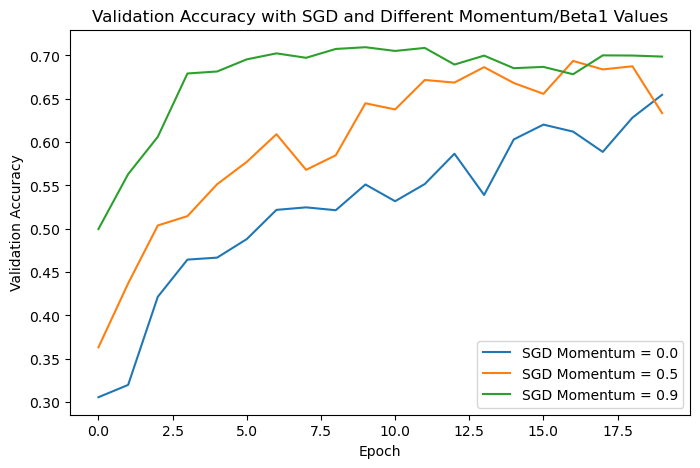

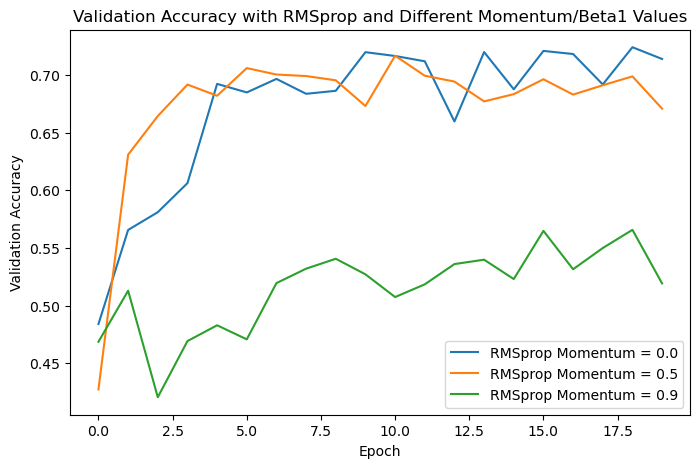

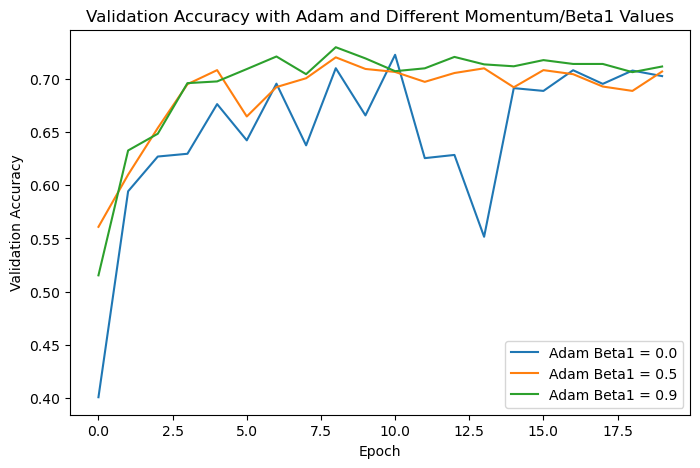

In [ ]:
# Function to plot accuracy for different optimizers and momentum values
def plot_accuracy(history_list, momentum_values, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Momentum = {momentum_values[i]}' if optimizer_name == 'SGD' or optimizer_name == 'RMSprop' else f'{optimizer_name} Beta1 = {momentum_values[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy with {optimizer_name} and Different Momentum/Beta1 Values')
    plt.legend()
    plt.show()

plot_accuracy(sgd_history_list, momentum_values_sgd, 'SGD')
plot_accuracy(rmsprop_history_list, momentum_values_rmsprop, 'RMSprop')
plot_accuracy(adam_history_list, beta1_values_adam, 'Adam')

This trains the CNN model with three different optimizers: SGD, Adam, and RMSprop, each with different momentum values.
It then plots the validation accuracy over epochs for each optimizer with different momentum/beta1 values, allowing you to compare their performance.

In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
def create_cnn_model(regularizer=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Define L2 regularization strength
l2_strength = 0.001

In [ ]:
# Create models with L2 regularization for each optimizer
sgd_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
adam_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
rmsprop_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))

In [ ]:
# Compile models with different optimizers
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train models
sgd_history = sgd_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
adam_history = adam_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 [==============================] - 47s 58ms/step - loss: 2.2551 - accuracy: 0.2145 - val_loss: 2.1169 - val_accuracy: 0.2716
Epoch 2/20
782/782 [==============================] - 44s 56ms/step - loss: 2.0021 - accuracy: 0.3266 - val_loss: 1.9147 - val_accuracy: 0.3603
Epoch 3/20
782/782 [==============================] - 44s 57ms/step - loss: 1.8118 - accuracy: 0.3981 - val_loss: 1.9710 - val_accuracy: 0.3515
Epoch 4/20
782/782 [==============================] - 45s 57ms/step - loss: 1.6746 - accuracy: 0.4453 - val_loss: 1.6270 - val_accuracy: 0.4595
Epoch 5/20
782/782 [==============================] - 45s 57ms/step - loss: 1.5933 - accuracy: 0.4758 - val_loss: 1.6695 - val_accuracy: 0.4564
Epoch 6/20
782/782 [==============================] - 44s 57ms/step - loss: 1.5305 - accuracy: 0.5004 - val_loss: 1.4909 - val_accuracy: 0.5083
Epoch 7/20
782/782 [==============================] - 45s 58ms/step - loss: 1.4766 - accuracy: 0.5212 - val_loss: 1.6911 - val_accuracy:

Epoch 18/20
782/782 [==============================] - 33s 42ms/step - loss: 0.5029 - accuracy: 0.8889 - val_loss: 1.1799 - val_accuracy: 0.7177
Epoch 19/20
782/782 [==============================] - 33s 42ms/step - loss: 0.4815 - accuracy: 0.8970 - val_loss: 1.2006 - val_accuracy: 0.7205
Epoch 20/20
782/782 [==============================] - 33s 42ms/step - loss: 0.4635 - accuracy: 0.9022 - val_loss: 1.2482 - val_accuracy: 0.7233


In [ ]:
# Evaluate models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("SGD Optimizer:")
evaluate_model(sgd_model, test_images, test_labels)

print("Adam Optimizer:")
evaluate_model(adam_model, test_images, test_labels)

print("RMSprop Optimizer:")
evaluate_model(rmsprop_model, test_images, test_labels)

SGD Optimizer:
313/313 [==============================] - 2s 8ms/step - loss: 1.1618 - accuracy: 0.6458
Test accuracy: 0.645799994468689
Adam Optimizer:
313/313 [==============================] - 2s 7ms/step - loss: 1.1409 - accuracy: 0.7111
Test accuracy: 0.7110999822616577
RMSprop Optimizer:
313/313 [==============================] - 2s 8ms/step - loss: 1.2482 - accuracy: 0.7233
Test accuracy: 0.7232999801635742


Enhancing the generalization of the models by adding L2 regularization to the Conv2D layers lowers the danger of overfitting and may even improve the performance of the models on unobserved data.
When developing deep learning models, it is a valuable strategy to take into account, especially when working with challenging datasets or sparse training data.

In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Build CNN model:**
The model consists of three Convolutional layers with MaxPooling, followed by two Dense layers. It uses ReLU activation for hidden layers and softmax activation for the output layer. The model.summary() displays the model architecture and parameters.

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels_preprocessed = to_categorical(train_labels, num_classes)
test_labels_preprocessed = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Data Preprocessing
# Normalize pixel values to range [0, 1]
train_images_preprocessed, test_images_preprocessed = train_images / 255.0, test_images / 255.0

In [ ]:
# Without Data Preprocessing
train_images_no_preprocessing, test_images_no_preprocessing = train_images, test_images
train_labels_no_preprocessing = tf.squeeze(train_labels)  # Remove extra dimensions from one-hot encoding
test_labels_no_preprocessing = tf.squeeze(test_labels)

In [ ]:
# Create models without preprocessing and compile them
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create models with preprocessing and compile them
model_preprocessing = create_cnn_model()
model_preprocessing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
history_no_preprocessing = model_no_preprocessing.fit(train_images_no_preprocessing, train_labels_no_preprocessing, epochs=20, batch_size=64, validation_data=(test_images_no_preprocessing, test_labels_no_preprocessing))
history_preprocessing = model_preprocessing.fit(train_images_preprocessed, train_labels_preprocessed, epochs=20, batch_size=64, validation_data=(test_images_preprocessed, test_labels_preprocessed))

In [ ]:
# Evaluate models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("Without Data Preprocessing:")
evaluate_model(model_no_preprocessing, test_images_no_preprocessing, test_labels_no_preprocessing)

print("With Data Preprocessing:")
evaluate_model(model_preprocessing, test_images_preprocessed, test_labels_preprocessed)

Without Data Preprocessing:
313/313 [==============================] - 2s 8ms/step - loss: 2.0910 - accuracy: 0.6362
Test accuracy: 0.6362000107765198
With Data Preprocessing:
313/313 [==============================] - 2s 7ms/step - loss: 1.6402 - accuracy: 0.6928
Test accuracy: 0.692799985408783


Without data preparation

Test precision: 0.6362
Reason: In this instance, the model is trained using only the unprocessed raw pixel values from the CIFAR-10 photos.
The tests attained accuracy is roughly 63.62%. Preprocessing may have improved the models ability to learn the underlying patterns in the data, leading to higher accuracy.


Utilizing Data Preprocessing

Test precision: 0.6928
Reason: In this instance, preprocessing the CIFAR-10 images is done before training the model.
Preprocessing often include implementing further modifications, such as scaling or data augmentation, as well as normalizing pixel values to a range of [0, 1].
The model has acquired more pertinent characteristics and patterns through data preprocessing, increasing accuracy by about 69.28%. The model performs better on new data and generalizes more readily as a result of data preparation

In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
# Define the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile and train the model with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop']
histories = []

for optimizer_name in optimizers:
    model = create_cnn_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=40, batch_size=64, validation_data=(test_images, test_labels))
    histories.append(history)

Epoch 1/40
782/782 [==============================] - 44s 47ms/step - loss: 2.1544 - accuracy: 0.2015 - val_loss: 2.2012 - val_accuracy: 0.2029
Epoch 2/40
782/782 [==============================] - 32s 41ms/step - loss: 1.8875 - accuracy: 0.3213 - val_loss: 1.8011 - val_accuracy: 0.3544
Epoch 3/40
782/782 [==============================] - 33s 42ms/step - loss: 1.6692 - accuracy: 0.4045 - val_loss: 1.5972 - val_accuracy: 0.4236
Epoch 4/40
782/782 [==============================] - 32s 41ms/step - loss: 1.5286 - accuracy: 0.4533 - val_loss: 1.5483 - val_accuracy: 0.4423
Epoch 5/40
782/782 [==============================] - 32s 40ms/step - loss: 1.4434 - accuracy: 0.4861 - val_loss: 2.0404 - val_accuracy: 0.3579
Epoch 6/40
782/782 [==============================] - 33s 42ms/step - loss: 1.3820 - accuracy: 0.5084 - val_loss: 1.4294 - val_accuracy: 0.5008
Epoch 7/40
782/782 [==============================] - 32s 41ms/step - loss: 1.3240 - accuracy: 0.5300 - val_loss: 1.3819 - val_accuracy:

782/782 [==============================] - 34s 43ms/step - loss: 0.1762 - accuracy: 0.9381 - val_loss: 1.2846 - val_accuracy: 0.7148
Epoch 18/40
782/782 [==============================] - 34s 43ms/step - loss: 0.1521 - accuracy: 0.9464 - val_loss: 1.5005 - val_accuracy: 0.7002
Epoch 19/40
782/782 [==============================] - 33s 42ms/step - loss: 0.1380 - accuracy: 0.9512 - val_loss: 1.4551 - val_accuracy: 0.7132
Epoch 20/40
782/782 [==============================] - 33s 42ms/step - loss: 0.1324 - accuracy: 0.9529 - val_loss: 1.6491 - val_accuracy: 0.7031
Epoch 21/40
782/782 [==============================] - 33s 42ms/step - loss: 0.1221 - accuracy: 0.9565 - val_loss: 1.6717 - val_accuracy: 0.7100
Epoch 22/40
782/782 [==============================] - 33s 42ms/step - loss: 0.1118 - accuracy: 0.9600 - val_loss: 1.6623 - val_accuracy: 0.7125
Epoch 23/40
782/782 [==============================] - 33s 42ms/step - loss: 0.1133 - accuracy: 0.9597 - val_loss: 1.7979 - val_accuracy: 0.70

782/782 [==============================] - 32s 41ms/step - loss: 0.0779 - accuracy: 0.9783 - val_loss: 3.6152 - val_accuracy: 0.6834
Epoch 34/40
782/782 [==============================] - 32s 41ms/step - loss: 0.0778 - accuracy: 0.9783 - val_loss: 3.4951 - val_accuracy: 0.7136
Epoch 35/40
782/782 [==============================] - 33s 42ms/step - loss: 0.0782 - accuracy: 0.9783 - val_loss: 3.5556 - val_accuracy: 0.6983
Epoch 36/40
782/782 [==============================] - 32s 41ms/step - loss: 0.0768 - accuracy: 0.9793 - val_loss: 4.6629 - val_accuracy: 0.6619
Epoch 37/40
782/782 [==============================] - 32s 41ms/step - loss: 0.0816 - accuracy: 0.9787 - val_loss: 3.4334 - val_accuracy: 0.7192
Epoch 38/40
782/782 [==============================] - 33s 42ms/step - loss: 0.0798 - accuracy: 0.9787 - val_loss: 3.2871 - val_accuracy: 0.7133
Epoch 39/40
782/782 [==============================] - 32s 41ms/step - loss: 0.0817 - accuracy: 0.9789 - val_loss: 3.6922 - val_accuracy: 0.70

In [ ]:
# Evaluate models and print test accuracies
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    return accuracy

test_accuracies = []
for i, optimizer_name in enumerate(optimizers):
    test_accuracy = evaluate_model(histories[i].model, test_images, test_labels)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy}")

313/313 [==============================] - 2s 8ms/step - loss: 1.0967 - accuracy: 0.6776
Test accuracy with sgd optimizer: 0.6776000261306763
313/313 [==============================] - 2s 8ms/step - loss: 2.5661 - accuracy: 0.7032
Test accuracy with adam optimizer: 0.7031999826431274
313/313 [==============================] - 2s 8ms/step - loss: 3.7065 - accuracy: 0.7111
Test accuracy with rmsprop optimizer: 0.7110999822616577


In [ ]:
# Find the optimizer with the best accuracy
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
print(f"\nBest optimizer based on test accuracy: {best_optimizer}")


Best optimizer based on test accuracy: rmsprop


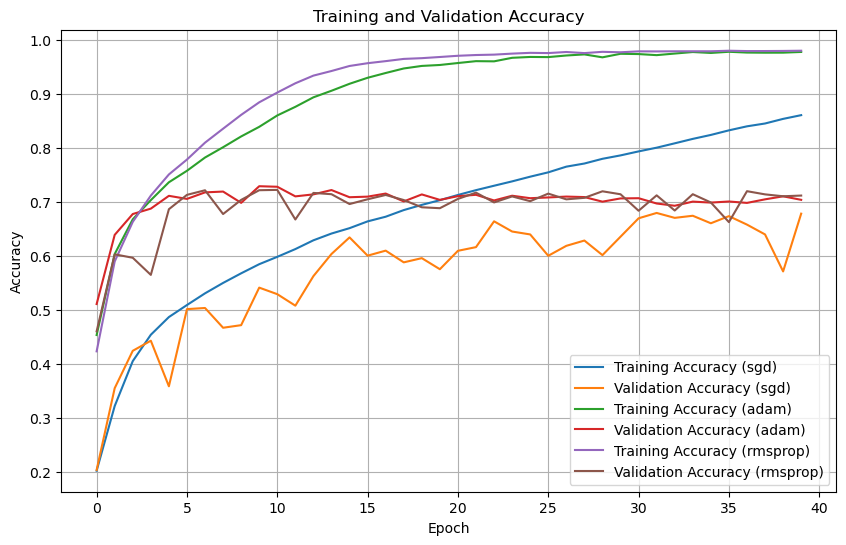

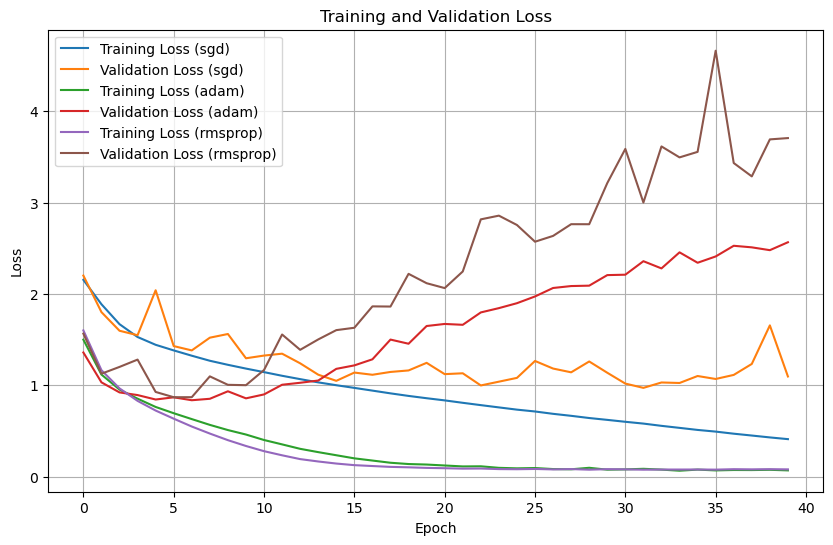

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['loss'], label=f'Training Loss ({optimizer_name})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#The test accuracy for the Stochastic Gradient Descent (SGD) optimizer was about 67.76%.
#SGD is a well-known optimization algorithm that is employed in neural network training.
#Due to its noise-prone nature, it occasionally struggles with complex data and converges slowly.
#The model may not have been able to learn complicated patterns in the CIFAR-10 dataset as a result, which would explain the modes moderate accuracy.

#The Adam optimizers test accuracy was about 70.32 percent.
#Popular adaptive optimization technique Adam combines the advantages of RMSprop and AdaGrad.
#In practice, it frequently works well and converges more quickly than conventional SGD.
#In comparison to SGD, the model that was trained using Adam was better able to identify complicated patterns and features in the data.

#The test accuracy for the RMSprop optimizer was roughly 71.11%.
#Another adaptive optimization approach that addresses some of AdaGrads drawbacks is RMSprop.
#Based on the average of the most recent magnitudes of gradients, it modifies the learning rate for each weight.
#On the CIFAR-10 dataset, the RMSprop optimizer was able to further improve the models capacity for learning and generalization, yielding the highest accuracy of the three optimizers.




**Description:**

In this assignment, we are working on building a Convolutional Neural Network (CNN) to classify the CIFAR-10 dataset. The objective is to achieve maximum accuracy with minimum loss while avoiding overfitting. We explored various optimization techniques, regularization methods (L1 and L2), and the impact of data preprocessing on model performance.

Our optimization are Stochastic Gradient Descent (SGD), Adaptive Moment Estimation (Adam), and Root Mean Square Propagation (RMSprop).

Overall, this assignment help use to understand different optimization techniques and regularization methods, and it help us to understand the importance of data preprocessing in training CNN models.